# Students Grade Prediction

### import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [38]:
df = pd.read_csv("https://raw.githubusercontent.com/fatemearyaie/Student-Grade-Prediction/main/student-mat.csv")

In [39]:
df.shape

(395, 33)

In [40]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [6]:
df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [7]:
df['famsup']

0       no
1      yes
2       no
3      yes
4      yes
      ... 
390    yes
391     no
392     no
393     no
394     no
Name: famsup, Length: 395, dtype: object

In [65]:
df['internet'] = df['internet'].map({'yes':1, 'no':0})
df['famsup'] = df['famsup'].map({'yes':1, 'no':0})

In [66]:
corr = df.corr()

<AxesSubplot:>

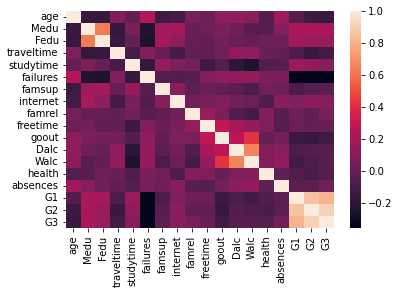

In [67]:
sns.heatmap(corr)

### Query
   ### by pandas

In [11]:
df[df['G3']>18]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
47,GP,M,16,U,GT3,T,4,3,health,services,...,4,2,2,1,1,2,4,19,19,20
110,GP,M,15,U,LE3,A,4,4,teacher,teacher,...,5,5,3,1,1,4,6,18,19,19
113,GP,M,15,U,LE3,T,4,2,teacher,other,...,3,5,2,1,1,3,10,18,19,19
286,GP,F,18,U,GT3,T,2,2,at_home,at_home,...,4,3,3,1,2,2,5,18,18,19
374,MS,F,18,R,LE3,T,4,4,other,other,...,5,4,4,1,1,1,0,19,18,19


In [12]:
df[(df['G3']>15) & (df['absences']<3) & (df['age']>17)]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
306,GP,M,20,U,GT3,A,3,2,services,other,...,5,5,3,1,1,5,0,17,18,18
359,MS,F,18,U,LE3,T,1,1,at_home,services,...,5,3,2,1,1,4,0,18,16,16
374,MS,F,18,R,LE3,T,4,4,other,other,...,5,4,4,1,1,1,0,19,18,19


In [13]:
#the average age for students in the dataset
df['G3'].mean()

10.415189873417722

In [14]:
# Count of male students are there in the datase
df.loc[df['sex']=='M','G3'].count()

187

In [15]:
#the average final grade for students with more than 5 absences
df.loc[df['absences']>5,'G3'].mean()

10.835616438356164

In [16]:
#correlation between alcohol consumption and final grade
df['Dalc'].corr(df['G3'])

-0.05466004056673598

In [17]:
#the average final grade for students with no internet access
df.loc[df['internet'] == '0', 'G3'].mean()

nan

In [20]:
# the average age of students in the dataset
df['age'].mean()

16.696202531645568

In [21]:
# the distribution of family sizes in the dataset
# greater than 3, less/equal to 3
df['famsize'].value_counts()

GT3    281
LE3    114
Name: famsize, dtype: int64

In [22]:
#the correlation between family support and internet access
df['famsup'].corr(df['internet'])

0.10358112685445665

In [23]:
# the most common level of educational attainment among students in the dataset
print(df['Medu'].mode())
# OR
print(df['Medu'].value_counts().idxmax())

0    4
dtype: int64
4


In [24]:
# the average G2 of students in different age groups
grouped = df.groupby('age')
grouped['G2'].mean()

age
15    11.365854
16    11.182692
17    10.479592
18    10.134146
19     9.250000
20    13.666667
21     8.000000
22     8.000000
Name: G2, dtype: float64

In [25]:
#the relationship between study time and alcohol consumption
df['studytime'].corr(df['Dalc'])

-0.19601926349476037

In [30]:
#the relationship between family size and study time
dfcpfamst = pd.DataFrame(df['famsize'].map({'GT3':1,'LE3':0}))
dfcpfamst['famsize'].corr(df['studytime'])

0.07359486076088805

In [34]:
#the relationship between family support and G1
df['G1'].corr(df['famsup'])

-0.08456874902190245

## model development

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [68]:
df1 = df[['G1', 'G2', 'G3','studytime', 'failures', 'absences','internet']]

In [69]:
X = df1[['G1','G2', 'studytime', 'failures', 'absences','internet']]
Y = df1[['G3']]

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [82]:
lr = LinearRegression()

In [83]:
lr.fit(X_train,Y_train)

LinearRegression()

In [84]:
pred = lr.predict(X_test)

## Evaluation

In [85]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
print(r2_score(Y_test, pred))
print(mean_absolute_error(Y_test, pred))
print(mean_squared_error(Y_test, pred))

0.8204654931168436
1.0264508047285936
2.9171790054224114


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

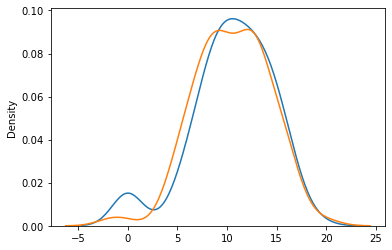

In [86]:
ax1 = sns.distplot(Y_test, hist=False)
sns.distplot(pred, hist=False, ax = ax1)